### **Required Libraries**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

In [3]:
data = pd.read_csv('Maternal Health Risk Data Set.csv',encoding='utf-8')
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [5]:
data.duplicated().sum()

np.int64(562)

In [6]:
data[data.duplicated(keep='first')]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
67,19,120,80,7.0,98.0,70,mid risk
72,19,120,80,7.0,98.0,70,mid risk
97,19,120,80,7.0,98.0,70,mid risk
106,50,140,90,15.0,98.0,90,high risk
107,25,140,100,6.8,98.0,80,high risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [7]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [8]:
data[data.Age > 60]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
114,63,140,90,15.0,98.0,90,high risk
313,62,120,80,6.9,98.0,66,low risk
322,65,90,60,6.9,98.0,70,low risk
326,66,85,60,6.9,98.0,86,low risk
338,70,85,60,6.9,102.0,70,low risk
339,65,120,90,6.9,103.0,76,low risk
435,65,130,80,15.0,98.0,86,high risk
502,63,140,90,15.0,98.0,90,high risk


In [9]:
data[data["Age"] < 13]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
19,10,70,50,6.9,98.0,70,low risk
35,12,95,60,6.1,102.0,60,low risk
62,12,95,60,7.2,98.0,77,low risk
82,12,95,60,6.9,98.0,65,mid risk
148,12,95,60,6.7,98.0,77,low risk
155,12,95,60,7.5,98.0,65,low risk
171,12,90,60,7.9,102.0,66,high risk
180,12,95,60,6.1,102.0,60,low risk
244,12,95,60,7.2,98.0,77,low risk
250,10,85,65,6.9,98.0,70,low risk


In [10]:
data[data["Age"] < 13].shape

(39, 7)

In [11]:
data["BodyTemp"].value_counts()

BodyTemp
98.0     804
101.0     98
102.0     66
100.0     20
103.0     13
99.0      10
98.4       2
98.6       1
Name: count, dtype: int64

## **Data Cleaninng**

In [12]:
df = data.copy()

In [13]:
df = df.drop_duplicates().reset_index(drop=True)

In [14]:
df.shape

(452, 7)

In [15]:
df['HeartRate'].unique()

array([86, 70, 80, 76, 78, 77, 88, 90, 66, 82, 60, 75, 67, 65, 68,  7])

In [16]:
df.HeartRate.mode()

0    70
Name: HeartRate, dtype: int64

In [17]:
df.loc[df.HeartRate == 7, "HeartRate"] = 70

In [18]:
df['HeartRate'].unique()

array([86, 70, 80, 76, 78, 77, 88, 90, 66, 82, 60, 75, 67, 65, 68])

In [19]:
df.RiskLevel.unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [20]:
df.replace({"high risk":2, "mid risk":1, "low risk":0}, inplace=True)
df.head()

C:\Users\ROG\AppData\Local\Temp\ipykernel_13544\247815498.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"high risk":2, "mid risk":1, "low risk":0}, inplace=True)


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0


In [21]:
df["RiskLevel"].value_counts().sum()

np.int64(452)

In [23]:
df.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

## **EDA**

Text(0.5, 1.0, 'Age by Risk Level')

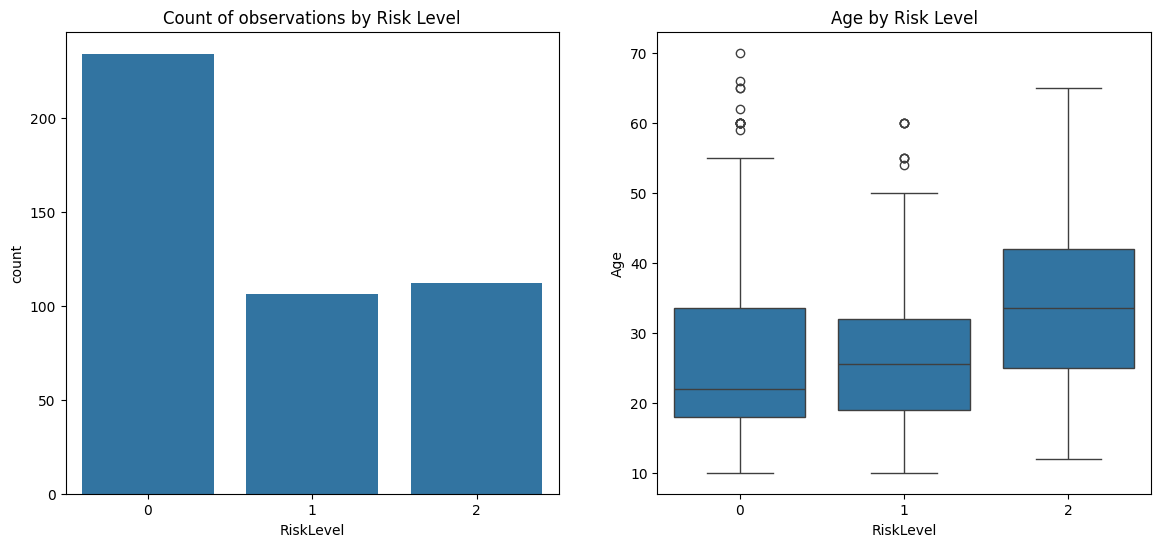

In [44]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.countplot(ax=axes[0], x=df.RiskLevel)
axes[0].set_title("Count of observations by Risk Level")

sns.boxplot(ax=axes[1], x=df.RiskLevel, y=df.Age)
axes[1].set_title("Age by Risk Level")

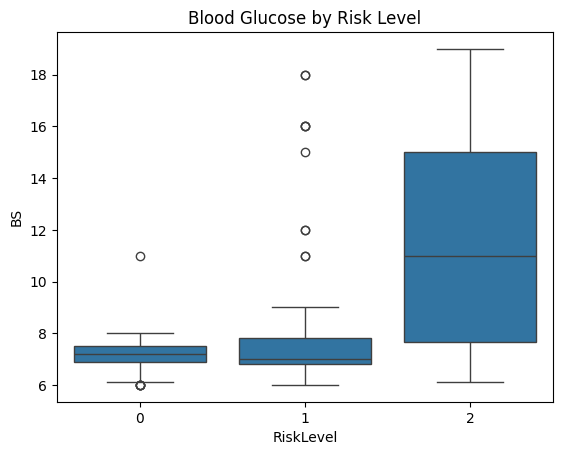

In [45]:
sns.boxplot(x=df.RiskLevel, y=df.BS).set_title("Blood Glucose by Risk Level");

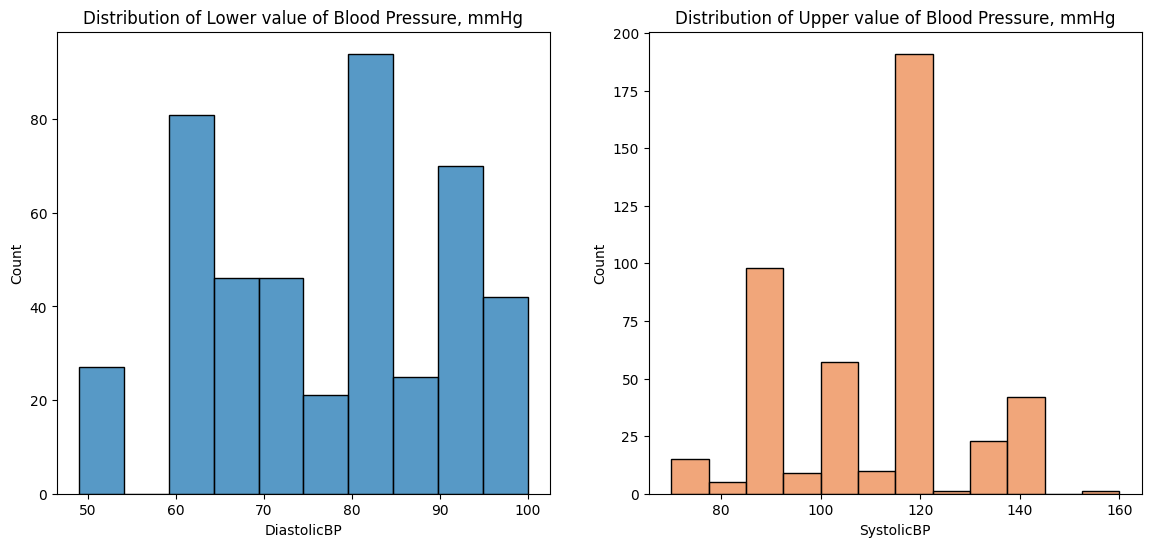

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.histplot(ax=axes[0], x=df.DiastolicBP)
axes[0].set_title("Distribution of Lower value of Blood Pressure, mmHg")

sns.histplot(ax=axes[1], x=df.SystolicBP, color="#ed894e")
axes[1].set_title("Distribution of Upper value of Blood Pressure, mmHg")

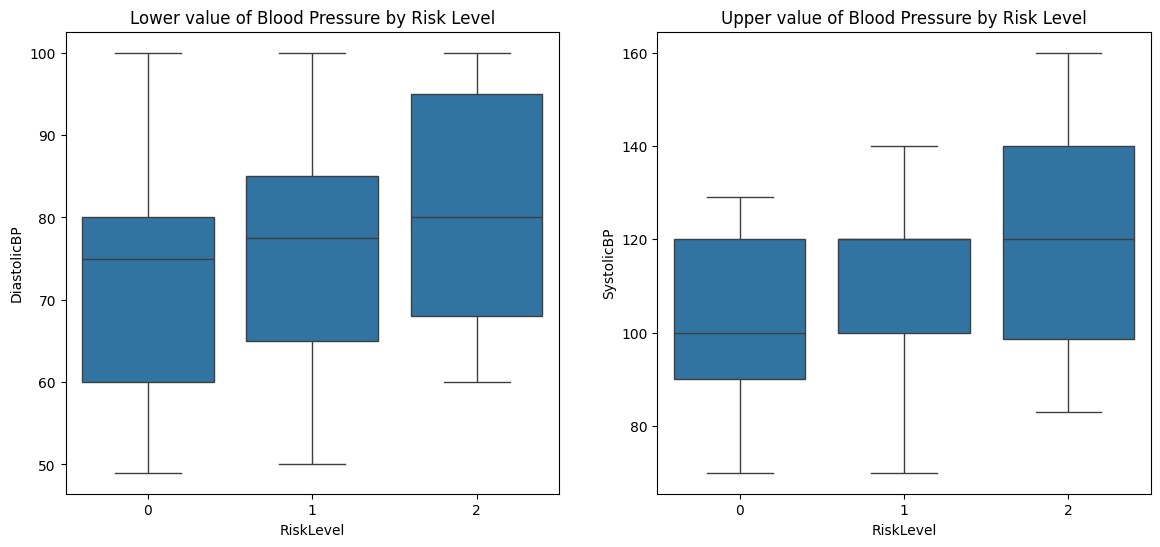

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.boxplot(ax=axes[0], x=df.RiskLevel, y=df.DiastolicBP)
axes[0].set_title("Lower value of Blood Pressure by Risk Level")

sns.boxplot(ax=axes[1], x=df.RiskLevel, y=df.SystolicBP)
axes[1].set_title("Upper value of Blood Pressure by Risk Level")

Text(0.5, 1.0, 'Body Temperature by Risk Level')

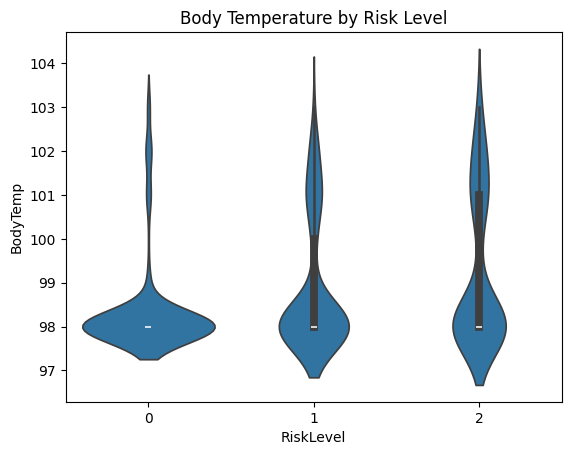

In [48]:
sns.violinplot(y=df.BodyTemp, x=df.RiskLevel).set_title("Body Temperature by Risk Level")

Text(0.5, 1.0, 'Heart Rate by Risk Level')

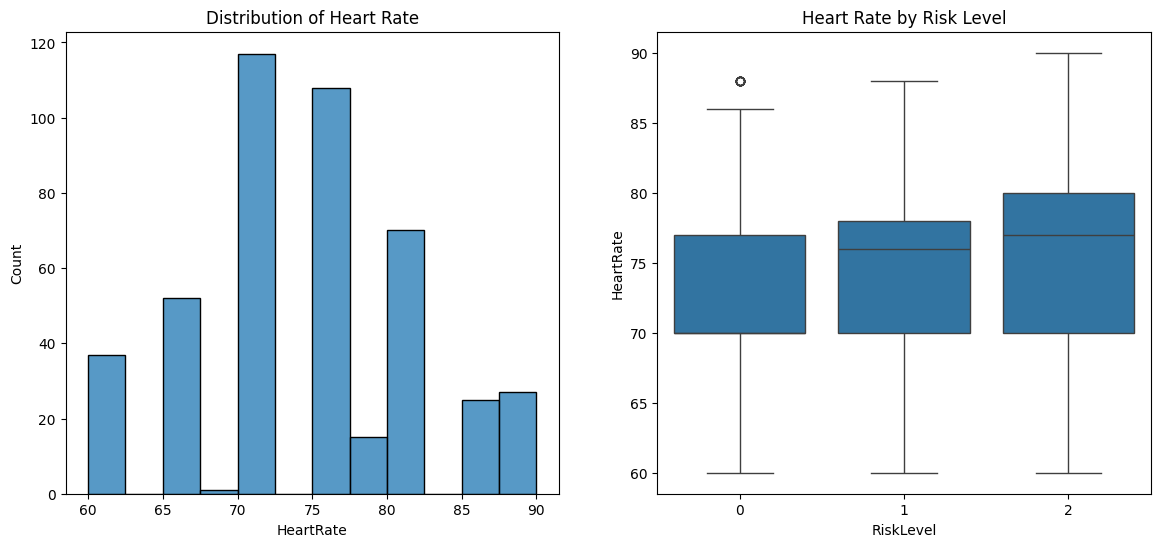

In [49]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,6))

sns.histplot(ax=axes[0], x=df.HeartRate)
axes[0].set_title("Distribution of Heart Rate")

sns.boxplot(ax=axes[1], x=df.RiskLevel, y=df.HeartRate)
axes[1].set_title("Heart Rate by Risk Level")

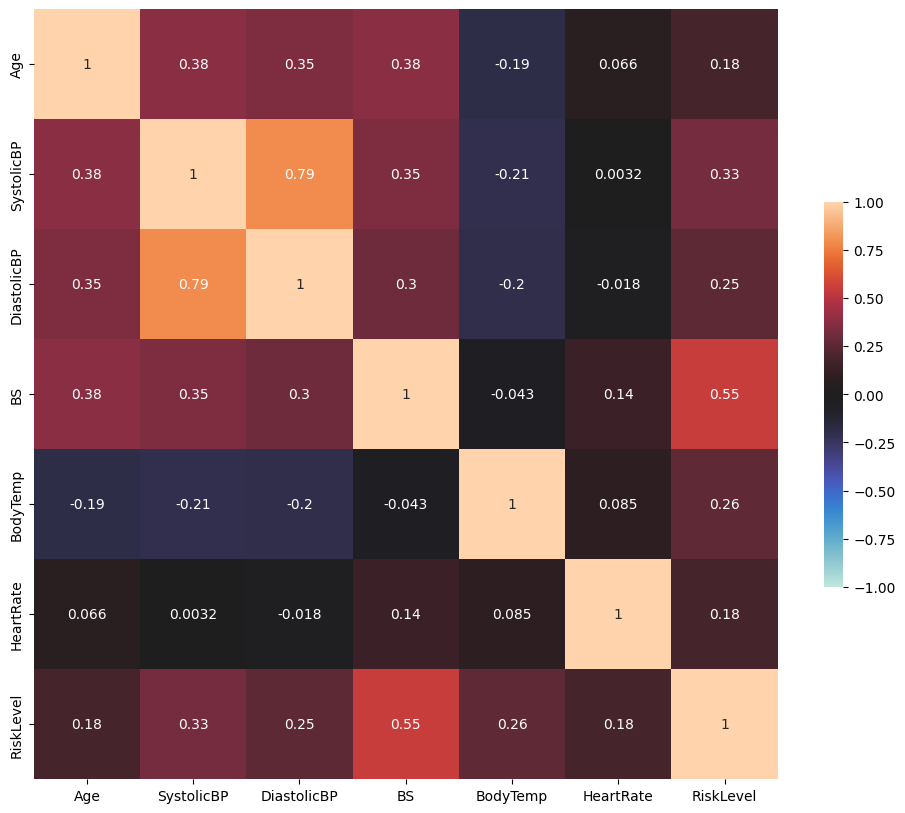

In [51]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),annot=True, vmin=-1, center=0,
           cbar_kws={"shrink": .5})

plt.show()

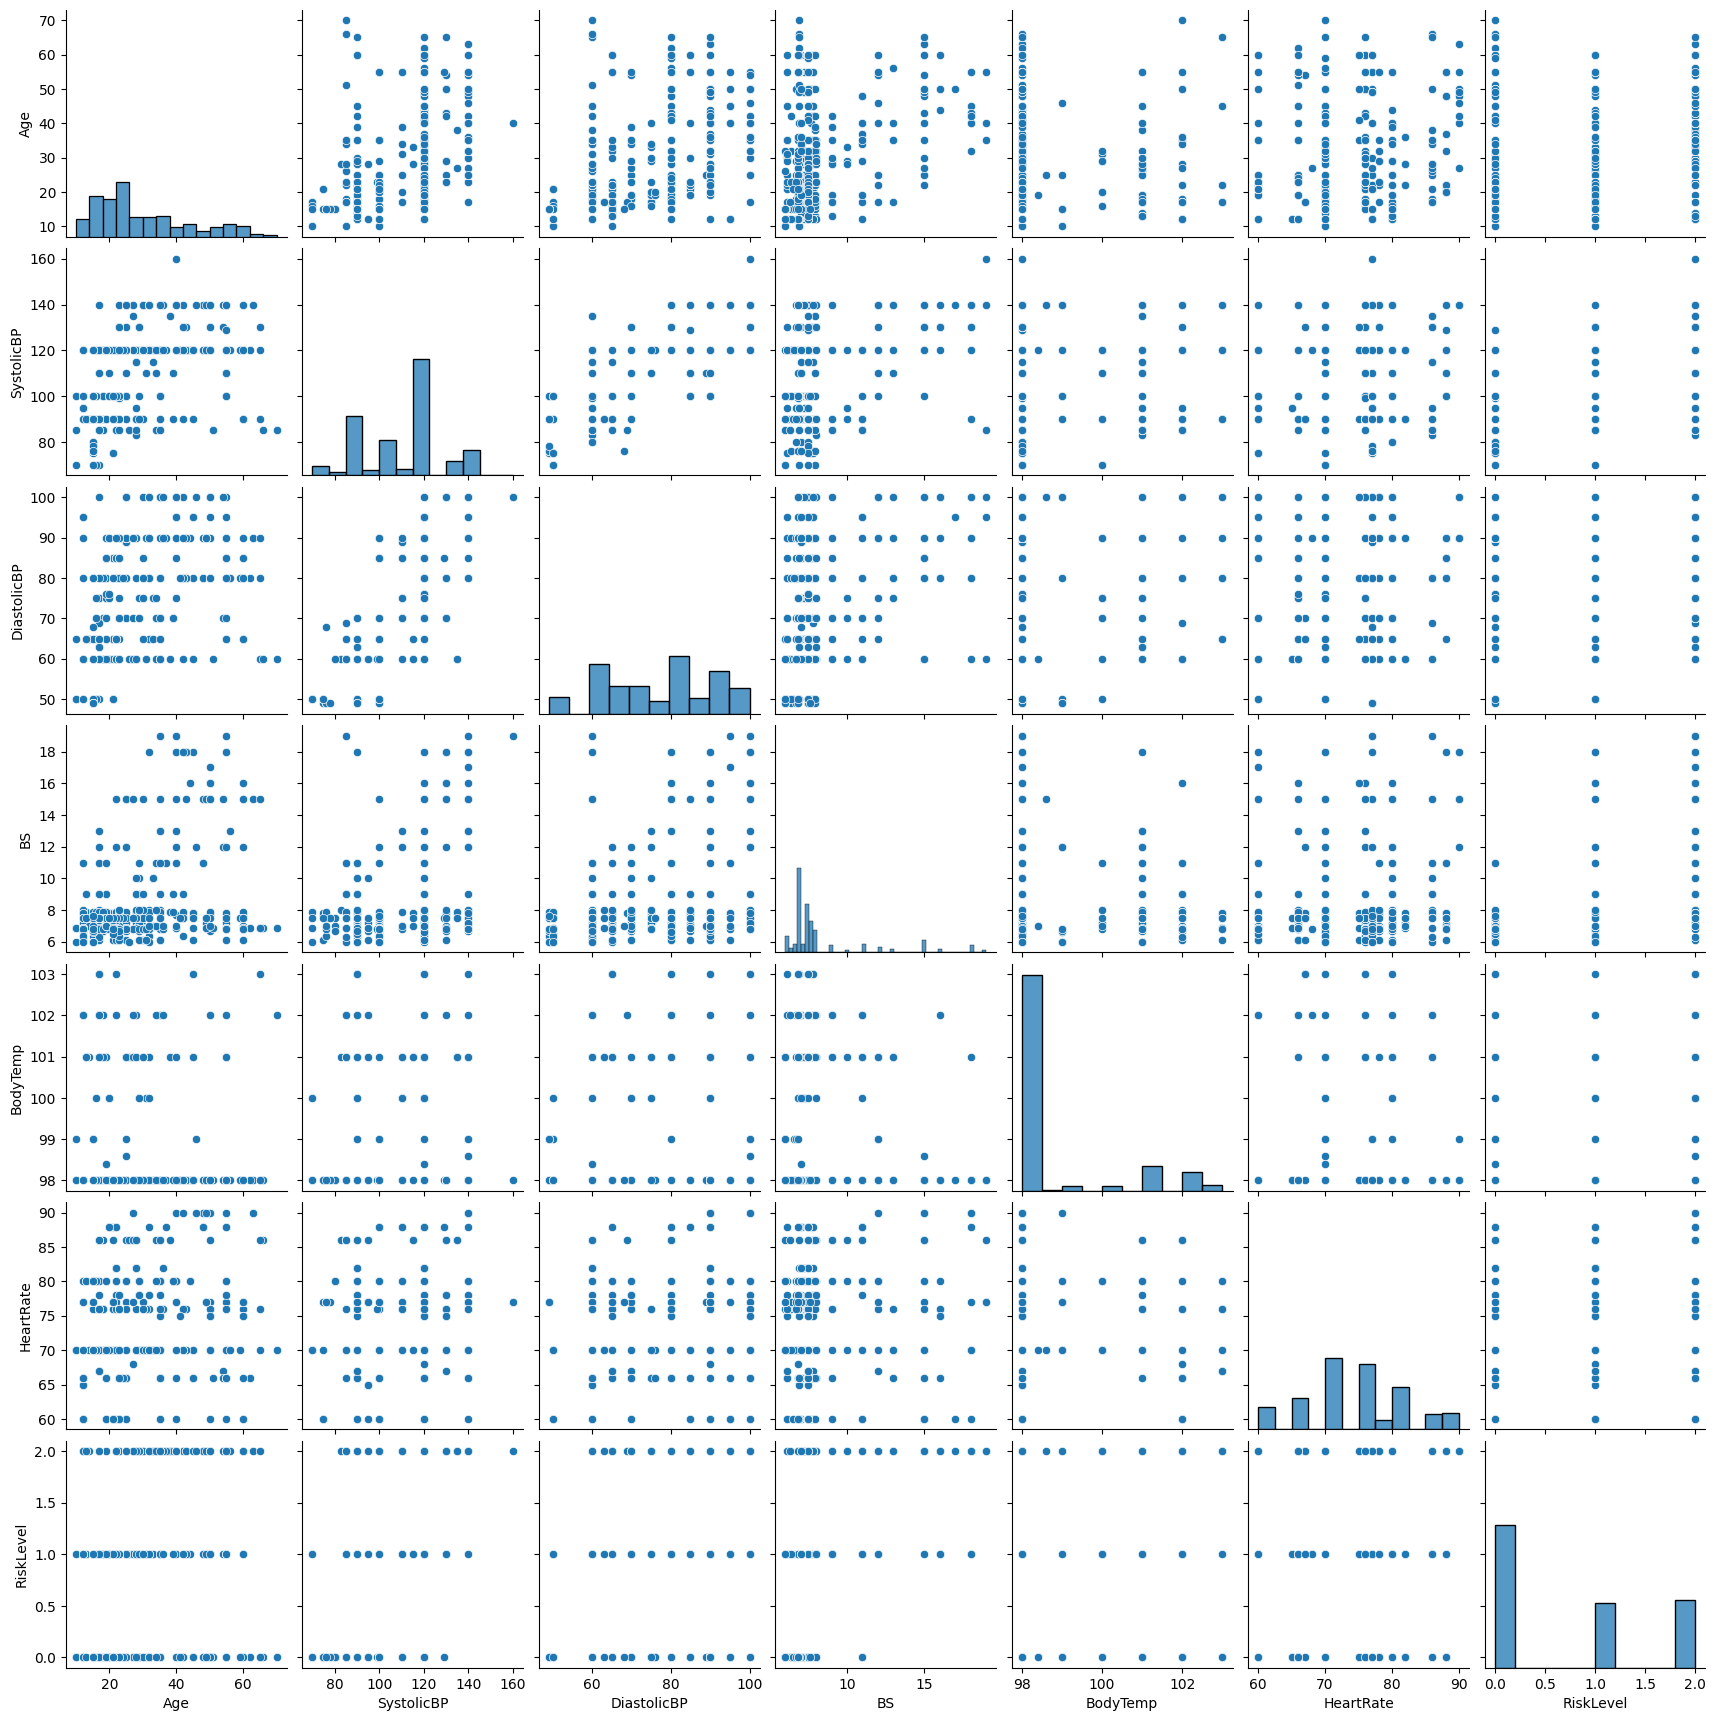

In [52]:
sns.pairplot(df)

0.197419127736239


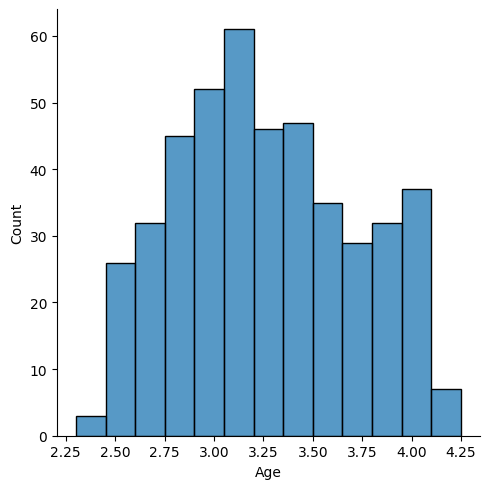

In [53]:
df_transformed = df.copy()

df_transformed["Age"] = df["Age"].apply(np.log)
print(df_transformed["Age"].skew())
sns.displot(df_transformed.Age)

In [54]:
X = df_transformed.drop('RiskLevel', axis=1)
y = df_transformed['RiskLevel']

In [55]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101, stratify=y)

In [57]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((316, 6), (136, 6), (316,), (136,))

In [58]:
# Create and fit a KNN model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Make predictions on the test data
knn_preds = knn.predict(X_test)

print('K Nearest Neighbors K=1')
print('\n')
print(confusion_matrix(y_test,knn_preds))
print('\n')
print(classification_report(y_test,knn_preds))

K Nearest Neighbors K=1


[[51 15  4]
 [18  7  7]
 [ 7  6 21]]


              precision    recall  f1-score   support

           0       0.67      0.73      0.70        70
           1       0.25      0.22      0.23        32
           2       0.66      0.62      0.64        34

    accuracy                           0.58       136
   macro avg       0.53      0.52      0.52       136
weighted avg       0.57      0.58      0.57       136



### Choosing K value

In [60]:
error_rate = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [61]:
error_rate

[np.float64(0.41911764705882354),
 np.float64(0.36764705882352944),
 np.float64(0.36764705882352944),
 np.float64(0.34558823529411764),
 np.float64(0.35294117647058826),
 np.float64(0.35294117647058826),
 np.float64(0.34558823529411764),
 np.float64(0.35294117647058826),
 np.float64(0.33088235294117646),
 np.float64(0.33088235294117646),
 np.float64(0.34558823529411764),
 np.float64(0.36764705882352944),
 np.float64(0.3602941176470588),
 np.float64(0.35294117647058826),
 np.float64(0.36764705882352944),
 np.float64(0.375),
 np.float64(0.38235294117647056),
 np.float64(0.36764705882352944),
 np.float64(0.36764705882352944)]

Text(0, 0.5, 'Error Rate')

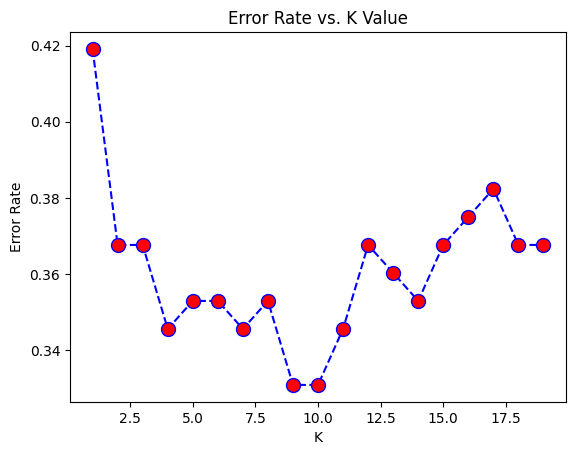

In [63]:
plt.plot(range(1,20), error_rate, color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [68]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)
knn_preds = knn.predict(X_test)

print('K Nearest Neighbors K=10')
print('\n')
print(confusion_matrix(y_test,knn_preds))
print('\n')
print(classification_report(y_test,knn_preds))
# accuracy
accuracy = np.mean(knn_preds == y_test)
print(f'Accuracy: {accuracy:.2f}')

K Nearest Neighbors K=10


[[64  4  2]
 [22  5  5]
 [ 8  4 22]]


              precision    recall  f1-score   support

           0       0.68      0.91      0.78        70
           1       0.38      0.16      0.22        32
           2       0.76      0.65      0.70        34

    accuracy                           0.67       136
   macro avg       0.61      0.57      0.57       136
weighted avg       0.63      0.67      0.63       136

Accuracy: 0.67


In [69]:
# Define class weights
class_weight = {0: 0.2, 1: 0.4, 2: 0.4}

# Create and fit a SVC model
svc = SVC(class_weight=class_weight)
svc.fit(X_train, y_train.values.ravel())

# Make predictions on the test data
svcKernel_pred = svc.predict(X_test)

# Evaluate the model
print('Support Vector Machine')
print('\n')
print(confusion_matrix(y_test, svcKernel_pred))
print("\n")
print(classification_report(y_test, svcKernel_pred))
print("\n")
# Print the accuracy
accuracy = np.mean(svcKernel_pred == y_test)
print(f'Accuracy: {accuracy:.2f}')

Support Vector Machine


[[60  6  4]
 [18  7  7]
 [ 5  5 24]]


              precision    recall  f1-score   support

           0       0.72      0.86      0.78        70
           1       0.39      0.22      0.28        32
           2       0.69      0.71      0.70        34

    accuracy                           0.67       136
   macro avg       0.60      0.59      0.59       136
weighted avg       0.64      0.67      0.64       136



Accuracy: 0.67


In [70]:
# create a Random Forest Classifier
forest = RandomForestClassifier(class_weight=class_weight)

# define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [20, 25, 30],
    'min_samples_leaf': [2, 3, 5] 
}

# create the GridSearchCV object
grid_search_forest = GridSearchCV(forest, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# fit the grid search to the data
grid_search_forest.fit(X_train, y_train)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_forest.best_params_)
print('Best Accuracy: ', grid_search_forest.best_score_)

# get the best model
best_forest = grid_search_forest.best_estimator_

Best Parameters:  {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 5, 'n_estimators': 100}
Best Accuracy:  0.7058531746031746


In [71]:
# Initialize the XGBClassifier
xgb_model = xgb.XGBClassifier(n_estimators=50)

# Define hyperparameters to tune
param_grid = {
    'eta': [0.01, 0.05, 0.1, 0.35],
    'max_depth': [2, 4, 7, 9, 12, 17],
    'min_child_weight': [2, 4, 7, 9, 12, 17]
}

# Perform Grid Search Cross Validation to find the best hyperparameters
xgb_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3)
xgb_search.fit(X_train, y_train)

# Get the best model from Grid Search
xgb_classifier = xgb_search.best_estimator_

# Fit the best model to the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions
xgb_pred = xgb_classifier.predict(X_test)
print("Best parameters found:", xgb_search.best_params_)

# Evaluate the model
print('XGBoost Classifier')
print('\n')
print(confusion_matrix(y_test,xgb_pred))
print("\n")
print(classification_report(y_test, xgb_pred))

# Print the accuracy
accuracy = np.mean(xgb_pred == y_test)
print(f'Accuracy: {accuracy:.2f}')

Best parameters found: {'eta': 0.1, 'max_depth': 2, 'min_child_weight': 2}
XGBoost Classifier


[[70  0  0]
 [23  6  3]
 [ 5  3 26]]


              precision    recall  f1-score   support

           0       0.71      1.00      0.83        70
           1       0.67      0.19      0.29        32
           2       0.90      0.76      0.83        34

    accuracy                           0.75       136
   macro avg       0.76      0.65      0.65       136
weighted avg       0.75      0.75      0.70       136

Accuracy: 0.75


c:\Users\ROG\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [72]:
import pickle

# Save the trained model to a pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(xgb_classifier, file)

print("Model saved as xgb_classifier_model.pkl")

Model saved as xgb_classifier_model.pkl


In [79]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Scaler saved as scaler.pkl")

Scaler saved as scaler.pkl


In [75]:
X

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,3.218876,130,80,15.0,98.0,86
1,3.555348,140,90,13.0,98.0,70
2,3.367296,90,70,8.0,100.0,80
3,3.401197,140,85,7.0,98.0,70
4,3.555348,120,60,6.1,98.0,76
...,...,...,...,...,...,...
447,2.484907,100,50,6.4,98.0,70
448,2.708050,100,60,6.0,98.0,80
449,2.708050,100,49,7.6,98.0,77
450,2.484907,100,50,6.0,98.0,70


In [80]:
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)


In [82]:
values = loaded_scaler.transform([[25, 120, 80, 85, 98.6, 75]])
res = model.predict(values)
if res == 0:
    print("Low Risk")
elif res == 1:
    print("Mid Risk")
else:
    print("High Risk")  

High Risk


c:\Users\ROG\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
